In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
df_date = pd.read_csv("dim_date.csv")
df_makers = pd.read_csv("electric_vehicle_sales_by_makers.csv")
df_state = pd.read_csv("electric_vehicle_sales_by_state.csv")

In [4]:
df_date.dtypes

date           object
fiscal_year     int64
quarter        object
dtype: object

In [5]:
df_date["date"] = pd.to_datetime(df_date["date"], format = "%d-%b-%y")

In [6]:
df_date.dtypes

date           datetime64[ns]
fiscal_year             int64
quarter                object
dtype: object

In [7]:
df_date.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

In [8]:
df_makers.dtypes

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object

In [9]:
df_makers["date"] = pd.to_datetime(df_makers["date"], format = "%d-%b-%y")
df_makers.dtypes

date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
dtype: object

In [10]:
df_state["date"] = pd.to_datetime(df_state["date"], format = "%d-%b-%y")
df_state.dtypes

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object

In [11]:
df_makers.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [12]:
df_state.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [13]:
df_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229


In [14]:
df_state["state"].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [15]:
df_state["state"] = df_state["state"].replace('Andaman & Nicobar Island', 'Andaman & Nicobar Islands')
df_state["state"] = df_state["state"].replace('Andaman & Nicobar', 'Andaman & Nicobar Islands')
df_state["state"].unique()

array(['Sikkim', 'Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam', 'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir',
       'Ladakh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Puducherry', 'Tripura', 'Bihar', 'Chandigarh', 'Delhi',
       'Madhya Pradesh', 'Odisha', 'Punjab', 'Uttarakhand',
       'Himachal Pradesh', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [16]:
df_1 = pd.merge(left = df_date, right = df_makers, on = "date", how = "inner")
df_1 = df_1[(df_1["fiscal_year"] == 2023) & (df_1["vehicle_category"] == "2-Wheelers")]
df_top_3_2023 = df_1.groupby(["maker"], as_index = False)["electric_vehicles_sold"].sum().sort_values(by = "electric_vehicles_sold", ascending = False).head(3)
df_top_3_2023

,maker,electric_vehicles_sold
8,OLA ELECTRIC,152583
7,OKINAWA,96945
4,HERO ELECTRIC,88993


In [17]:
df_bottom_3_2023 = df_1.groupby(["maker"], as_index = False)["electric_vehicles_sold"].sum().sort_values(by = "electric_vehicles_sold", ascending = False).tail(3)
df_bottom_3_2023

,maker,electric_vehicles_sold
10,PURE EV,11556
3,BEING,11018
5,JITENDRA,8563


In [18]:
df_2 = pd.merge(left = df_date, right = df_makers, on = 'date', how = 'inner')
df_2 = df_2[(df_2["fiscal_year"] == 2024) & (df_2["vehicle_category"] == "2-Wheelers")]

df_top_3_2024 = df_2.groupby("maker", as_index = False)["electric_vehicles_sold"].sum().sort_values(
    by = "electric_vehicles_sold", ascending = False).head(3)
df_bottom_3_2024 = df_2.groupby("maker", as_index = False)["electric_vehicles_sold"].sum().sort_values(
    by = "electric_vehicles_sold", ascending = False).tail(3)

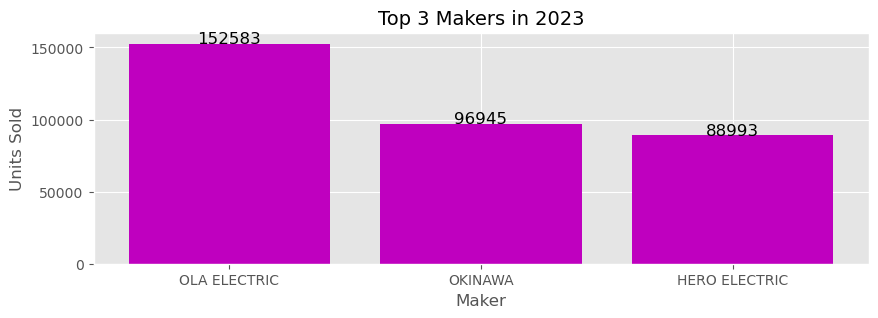

In [19]:
plt.figure(figsize = (10, 3))
plt.bar(df_top_3_2023["maker"], df_top_3_2023["electric_vehicles_sold"], color = "m", align = "center")

for i, value in enumerate(df_top_3_2023["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha = 'center', fontsize = 12)

plt.title("Top 3 Makers in 2023", fontsize = 14, loc = 'center')
plt.xlabel("Maker")
plt.ylabel("Units Sold")
#plt.xticks(ticks = np.arange(len(df_top_3["maker"])), labels=df_top_3["maker"], rotation=45)
plt.yticks(np.arange(0, 150001, 50000))
plt.show()

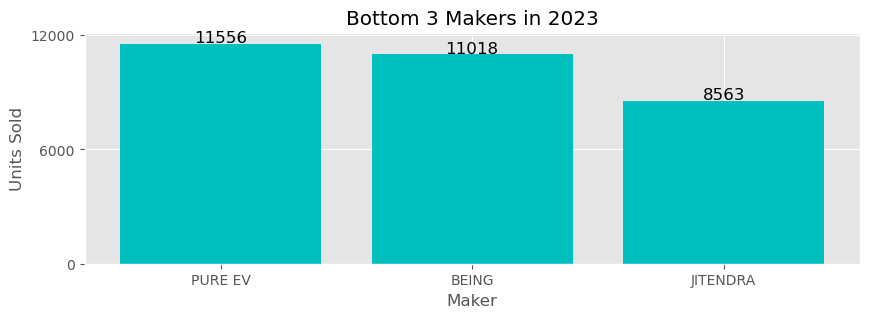

In [20]:
plt.figure(figsize = (10, 3))
plt.bar(df_bottom_3_2023["maker"], df_bottom_3_2023["electric_vehicles_sold"], color = "c", align = "center")

for i, value in enumerate(df_bottom_3_2023["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha = "center", fontsize = 12)

plt.title("Bottom 3 Makers in 2023")
plt.xlabel("Maker")
plt.ylabel("Units Sold")
plt.yticks(np.arange(0, 12001, 6000))
plt.show()

# 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

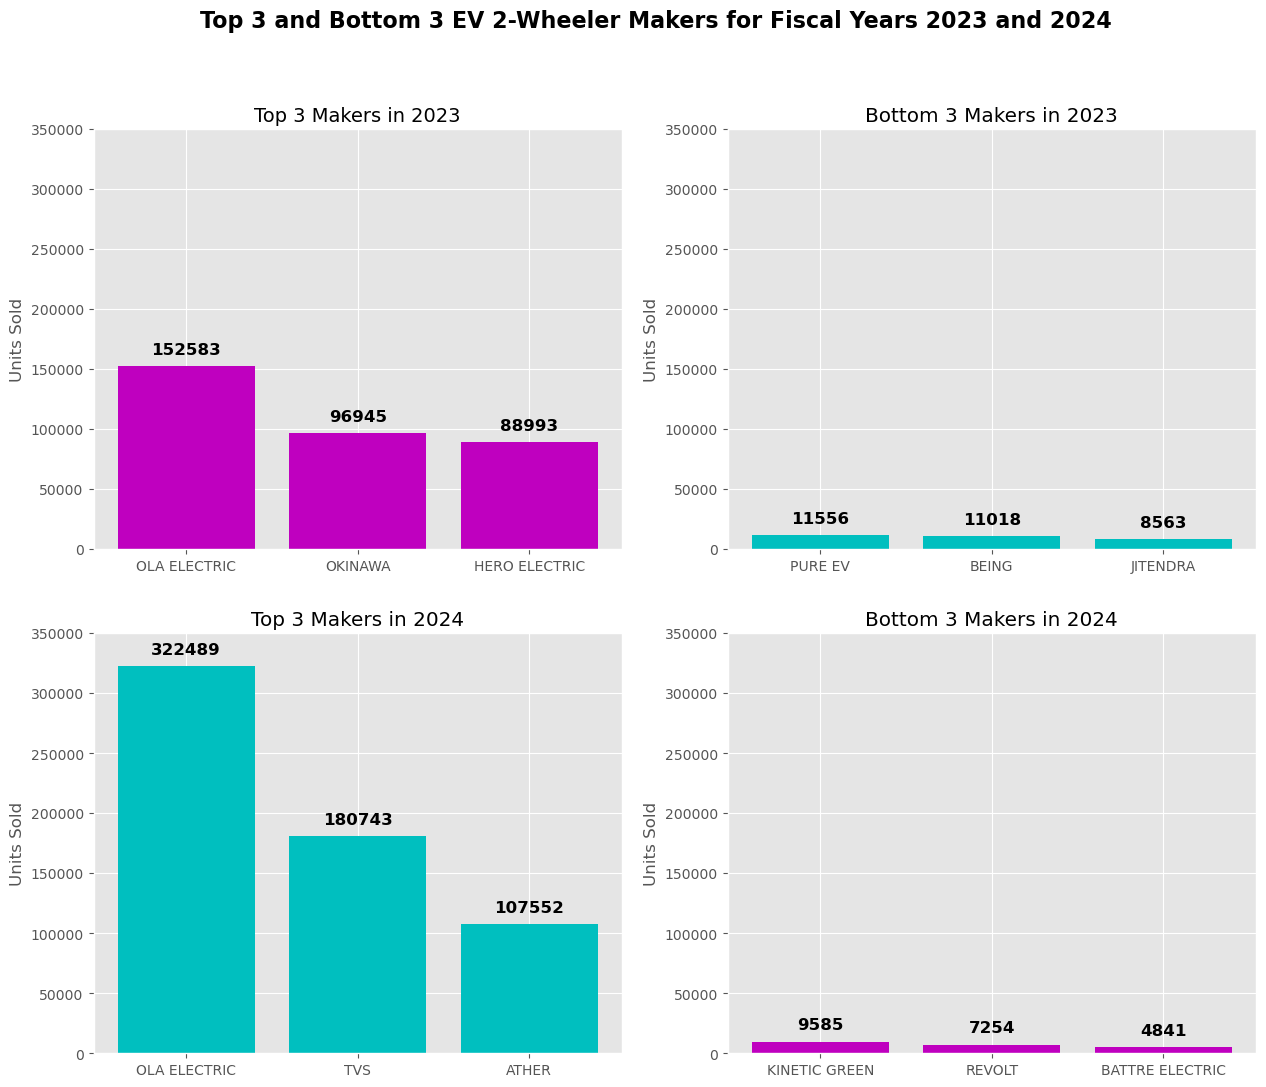

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12))

axs[0, 0].bar(df_top_3_2023["maker"], df_top_3_2023["electric_vehicles_sold"], color = "m", align = "center")

for i, value in enumerate(df_top_3_2023["electric_vehicles_sold"]):
    axs[0, 0].text(i, value + 10000, str(value), ha = 'center', fontsize = 12, fontweight = 'bold')

axs[0, 0].set_title("Top 3 Makers in 2023", fontsize = 14, loc = 'center')
#axs[0, 0].set_xlabel("Maker")
axs[0, 0].set_ylabel("Units Sold")
axs[0, 0].set_yticks(np.arange(0, 350001, 50000))


axs[0,1].bar(df_bottom_3_2023["maker"], df_bottom_3_2023["electric_vehicles_sold"], color = "c", align = "center")

for i, value in enumerate(df_bottom_3_2023["electric_vehicles_sold"]):
    axs[0,1].text(i, value + 10000, str(value), ha = "center", fontsize = 12, fontweight = 'bold')

axs[0,1].set_title("Bottom 3 Makers in 2023")
#axs[0,1].set_xlabel("Maker")
axs[0,1].set_ylabel("Units Sold")
axs[0,1].set_yticks(np.arange(0, 350001, 50000))


axs[1, 0].bar(df_top_3_2024["maker"], df_top_3_2024["electric_vehicles_sold"], color = "c", align = "center")

for i, value in enumerate(df_top_3_2024["electric_vehicles_sold"]):
    axs[1, 0].text(i, value + 10000, str(value), ha = 'center', fontsize = 12, fontweight = 'bold')

axs[1, 0].set_title("Top 3 Makers in 2024")
#axs[1, 0].set_xlabel("Maker")
axs[1, 0].set_ylabel("Units Sold")
axs[1, 0].set_yticks(np.arange(0, 350001, 50000))


axs[1, 1].bar(df_bottom_3_2024["maker"], df_bottom_3_2024["electric_vehicles_sold"], color = "m", align = "center")

for i, value in enumerate(df_bottom_3_2024["electric_vehicles_sold"]):
    axs[1, 1].text(i, value + 10000, str(value), ha = 'center', fontsize = 12, fontweight = 'bold')

axs[1, 1].set_title("Bottom 3 Makers in 2024")
#axs[1, 1].set_xlabel("Maker")
axs[1, 1].set_ylabel("Units Sold")
axs[1, 1].set_yticks(np.arange(0, 350001, 50000))

fig.suptitle("Top 3 and Bottom 3 EV 2-Wheeler Makers for Fiscal Years 2023 and 2024", fontsize = 16, fontweight = 'bold')

plt.show()

# 2. Identifythetop 5states withthehighest penetration ratein 2-wheeler and 4-wheeler EV sales in FY 2024.

In [24]:
df = pd.merge(left = df_date, right = df_state, on = "date", how = "inner")
df["penetration_rate"] = round((df["electric_vehicles_sold"] / df["total_vehicles_sold"]) * 100, 2)

df_pen_2W_2024 = df[(df["vehicle_category"] == '2-Wheelers') & (df["fiscal_year"] == 2024)]
df_pen_2W_2024 = df_pen_2W_2024.groupby("state", as_index = False)["penetration_rate"].mean().sort_values(by = "penetration_rate", ascending = False).head(5)
df_pen_2W_2024["penetration_rate"] = round(df_pen_2W_2024["penetration_rate"], 2)
df_pen_2W_2024


df_pen_4W_2024 = df[(df["vehicle_category"] == '4-Wheelers') & (df["fiscal_year"] == 2024)]
df_pen_4W_2024 = df_pen_4W_2024.groupby("state", as_index = False)["penetration_rate"].mean().sort_values(by = "penetration_rate", ascending = False).head(5)
df_pen_4W_2024 = round(df_pen_4W_2024, 2)
df_pen_4W_2024


,state,penetration_rate
16,Kerala,42.31
5,Chandigarh,4.92
9,Goa,4.37
15,Karnataka,4.28
8,Delhi,4.26


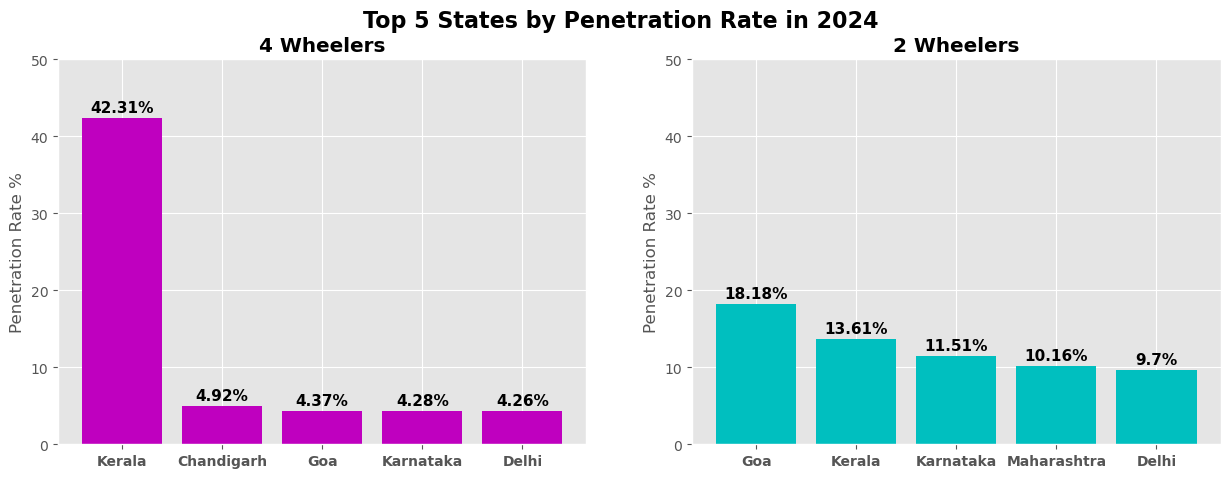

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].bar(df_pen_4W_2024["state"], df_pen_4W_2024["penetration_rate"], color = 'm')

for i, value in enumerate(df_pen_4W_2024["penetration_rate"]):
    axs[0].text(i, value + 0.75, str(value) + "%", ha = "center", fontsize = 11, fontweight = "bold")

axs[0].set_title("4 Wheelers", fontweight = "bold")
#axs[0].set_xlabel("State")
axs[0].set_ylabel("Penetration Rate %")
axs[0].set_xticks(range(len(df_pen_4W_2024)))
axs[0].set_xticklabels(df_pen_4W_2024["state"], fontweight = "bold")
axs[0].set_yticks(np.arange(0, 51, 10))


axs[1].bar(df_pen_2W_2024["state"], df_pen_2W_2024["penetration_rate"], color = 'c')

for i, value in enumerate(df_pen_2W_2024["penetration_rate"]):
    axs[1].text(i, value + 0.75, str(value) + "%", ha = "center", fontsize = 11,  fontweight = "bold")

axs[1].set_title("2 Wheelers", fontweight = "bold")
#axs[1].set_xlabel("State")
axs[1].set_ylabel("Penetration Rate %")
axs[1].set_xticks(range(len(df_pen_2W_2024)))
axs[1].set_xticklabels(df_pen_2W_2024["state"], fontweight = "bold")
axs[1].set_yticks(np.arange(0, 51, 10))

plt.suptitle("Top 5 States by Penetration Rate in 2024", fontsize = 16, fontweight = "bold")

plt.show()

# 3. List the states with negative penetration (decline) in EV sales from 2022 to 2024?

In [27]:
df = pd.merge(left = df_date, right = df_state, on = "date", how = "inner")

df_2022 = df[df["fiscal_year"] == 2022].copy()
df_2023 = df[df["fiscal_year"] == 2023].copy()
df_2024 = df[df["fiscal_year"] == 2024].copy()

df_2022["penetration_rate_2022"] = (df_2022["electric_vehicles_sold"] / df_2022["total_vehicles_sold"]) * 100
df_2022 = df_2022.groupby("state", as_index = False)["penetration_rate_2022"].mean().round(2)

df_2023["penetration_rate_2023"] = (df_2023["electric_vehicles_sold"] / df_2023["total_vehicles_sold"]) * 100
df_2023 = df_2023.groupby("state", as_index = False)["penetration_rate_2023"].mean().round(2)

df_2024["penetration_rate_2024"] = (df_2024["electric_vehicles_sold"] / df_2024["total_vehicles_sold"]) * 100
df_2024 = df_2024.groupby("state", as_index = False)["penetration_rate_2024"].mean().round(2)

df_new = pd.merge(left = df_2022, right = df_2023, on = "state", how = "inner")
df_new = pd.merge(left = df_new, right = df_2024, on = "state", how = "inner")

df_new["change_2022_2023"] = df_new["penetration_rate_2023"] - df_new["penetration_rate_2022"]
df_new["change_2023_2024"] = df_new["penetration_rate_2024"] - df_new["penetration_rate_2023"]
df_new["change_2022_2024"] = df_new["penetration_rate_2024"] - df_new["penetration_rate_2022"]

#df_new = df_new[(df_new["change_2022_2023"] < 0) | (df_new["change_2023_2024"] < 0) | (df_new["change_2022_2024"] < 0)]

df_new = df_new[df_new["change_2022_2024"] < 0]

#df_new = df_new[['state', 'change_2022_2023', 'change_2023_2024', 'change_2022_2024']].rename(columns = {
#                'state': 'State', 'change_2022_2023': 'Change from 2022 to 2023', 'change_2023_2024': 'Change from 2023 to 2024', 
#               'change_2022_2024': 'Change from 2022 to 2024'})

df_new = df_new[['state', 'change_2022_2024']].rename(columns = {'state': 'State', 'change_2022_2024': 'Change from 2022 to 2024'})

df_new

,State,Change from 2022 to 2024
0,Andaman & Nicobar Islands,-0.09
17,Ladakh,-0.63


# 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [29]:
df = pd.merge(left = df_date, right = df_makers, on = "date", how = "inner")
df.head()
df = df[(df["vehicle_category"] == "4-Wheelers") & (df["fiscal_year"].isin(i for i in range(2022, 2024, 1)))]

top5_makers = df.groupby("maker", as_index = False)["electric_vehicles_sold"].sum().sort_values(
                          by = "electric_vehicles_sold", ascending = False).head(5)
top5_makers

df_maker_quarter = df.groupby(["maker", "quarter"], as_index = False)["electric_vehicles_sold"].mean().round(2).sort_values(
                                by = ["electric_vehicles_sold", "quarter"], ascending = [False, True])
df_maker_quarter

df_top5_maker_quarter = pd.merge(left = top5_makers, right = df_maker_quarter, on = "maker", how = "inner")

df_top5_maker_quarter = df_top5_maker_quarter[["maker", "quarter", "electric_vehicles_sold_y"]].rename(columns = {
                                                'maker': 'Maker', 'quarter': 'Quarter', 'electric_vehicles_sold_y': 'Average Units Sold'})

df_top5_maker_quarter

,Maker,Quarter,Average Units Sold
0,Tata Motors,Q4,2560.33
1,Tata Motors,Q3,1740.33
2,Tata Motors,Q2,1374.00
3,Tata Motors,Q1,1117.67
4,Mahindra & Mahindra,Q4,1149.33
5,Mahindra & Mahindra,Q3,793.50
6,Mahindra & Mahindra,Q2,635.83
7,Mahindra & Mahindra,Q1,395.83
8,MG Motor,Q3,262.67
9,MG Motor,Q2,238.83


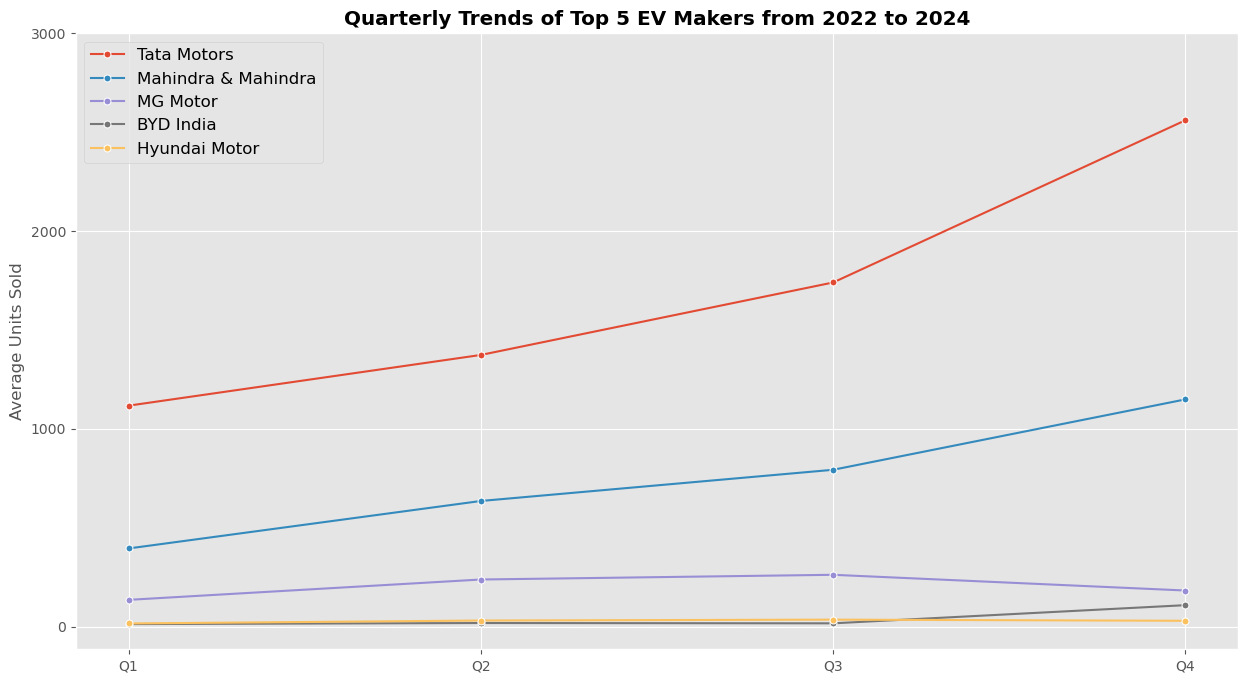

In [30]:
quarter_order = list(df_top5_maker_quarter["Quarter"].unique()).sort()

df_top5_maker_quarter["Quarter"] = pd.Categorical(df_top5_maker_quarter["Quarter"], categories = quarter_order, ordered = True)

plt.figure(figsize = (15, 8))

sns.lineplot(data = df_top5_maker_quarter, x = 'Quarter', y = 'Average Units Sold', hue = 'Maker', marker = 'o', ms = 5)
plt.title("Quarterly Trends of Top 5 EV Makers from 2022 to 2024", fontweight = 'bold')
plt.xlabel('')
plt.yticks(np.arange(0, 3001, 1000))
plt.legend(loc = 'best', fontsize = 12)
plt.show()

# 5. How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024? 

In [32]:
df = pd.merge(left = df_date, right = df_state, on = 'date', how = 'inner')
df = df[df["fiscal_year"] == 2024]
df["penetration_rate"] = (df["electric_vehicles_sold"] / df["total_vehicles_sold"]) * 100
df = df.groupby(["state"], as_index = False).agg({'electric_vehicles_sold':'sum', 'penetration_rate':'mean'})
df["penetration_rate"] = round(df["penetration_rate"], 2)
df = df[df["state"].isin(["Delhi", "Karnataka"])].sort_values(by = ["electric_vehicles_sold", "penetration_rate"], ascending = [False, False])
df

,state,electric_vehicles_sold,penetration_rate
15,Karnataka,160989,7.89
8,Delhi,46724,6.98


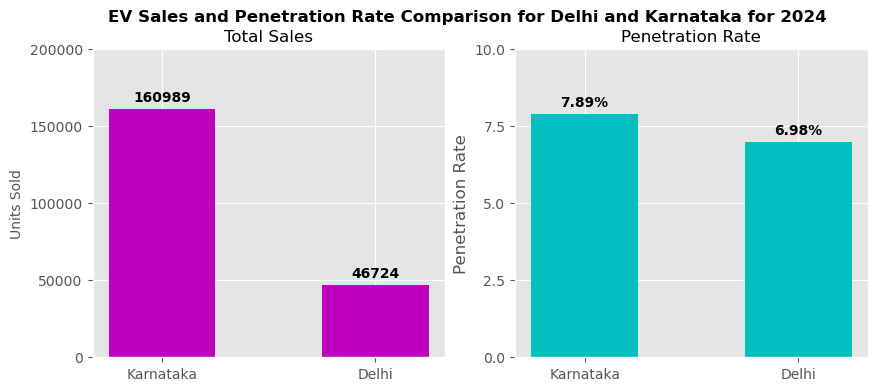

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

axs[0].bar(df["state"], df["electric_vehicles_sold"], align = 'center', color = 'm', width = 0.5)

for i, value in enumerate(df["electric_vehicles_sold"]):
    axs[0].text(i, value + 5000, str(value), ha = 'center', fontsize = 10, fontweight = 'bold')

axs[0].set_title("Total Sales", fontsize = 12)
axs[0].set_ylabel("Units Sold", fontsize = 10)
axs[0].set_yticks(np.arange(0, 200001, 50000))

axs[1].bar(df["state"], df["penetration_rate"], align = 'center', color = 'c', width = 0.5)

for i, value in enumerate(df["penetration_rate"]):
    axs[1].text(i, value + 0.25, str(value) + '%', ha = 'center', fontsize = 10, fontweight = 'bold')

axs[1].set_title("Penetration Rate", fontsize = 12)
axs[1].set_ylabel("Penetration Rate")
axs[1].set_yticks(np.arange(0, 11, 2.5))

plt.suptitle("EV Sales and Penetration Rate Comparison for Delhi and Karnataka for 2024", fontweight = 'bold')

plt.show()

# 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [35]:
df = pd.merge(left = df_date, right = df_makers, on = "date", how = "inner")
df
df = df[df["vehicle_category"] == '4-Wheelers']
df = df.groupby(["maker", "fiscal_year"], as_index = False)["electric_vehicles_sold"].sum()

ending_val = df.copy()
ending_val = ending_val[ending_val["fiscal_year"] == 2024]
ending_val.pop("fiscal_year")
ending_val = ending_val[["maker","electric_vehicles_sold"]].rename(columns = {'maker': 'Maker', 'electric_vehicles_sold': '2024 Sales'})
ending_val

begin_val = df.copy()
begin_val = begin_val[begin_val["fiscal_year"] == 2022]
begin_val.pop("fiscal_year")
begin_val = begin_val[["maker", "electric_vehicles_sold"]].rename(columns = {'maker': 'Maker', 'electric_vehicles_sold': '2022 Sales'})
begin_val

CAGR_cal = pd.merge(left = begin_val, right = ending_val, on = 'Maker', how = 'inner')

CAGR_cal = CAGR_cal[~(CAGR_cal["2022 Sales"] == 0)]

CAGR_cal["CAGR"] = round((((CAGR_cal["2024 Sales"] / CAGR_cal["2022 Sales"]) ** (1 / 2)) - 1) * 100, 2)

#By CAGR

CAGR_cal = CAGR_cal.sort_values("CAGR", ascending = False).head(5)
CAGR_cal = CAGR_cal.drop(columns = ['2022 Sales', '2024 Sales'])
CAGR_cal

#By Sales in 2024

#CAGR_cal = CAGR_cal.sort_values("2024 Sales", ascending = False).head(5)
#CAGR_cal

,Maker,CAGR
0,BMW India,1140.97
9,Volvo Auto India,971.21
1,BYD India,566.52
2,Hyundai Motor,255.48
6,Mercedes -Benz AG,234.55


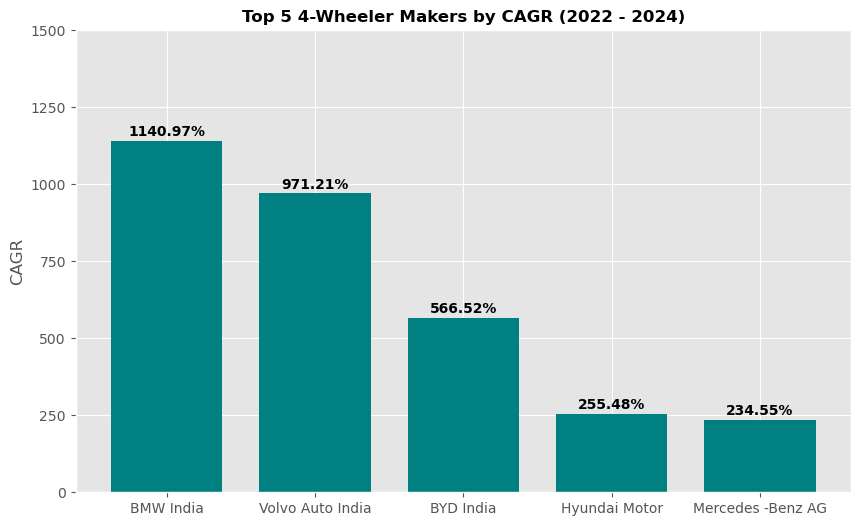

In [36]:
plt.figure(figsize = (10, 6))

plt.bar(CAGR_cal["Maker"], CAGR_cal["CAGR"], color = 'teal', align = 'center', width = 0.75)

for i, value in enumerate(CAGR_cal["CAGR"]):
    plt.text(i, value + 15, str(value) + '%', ha = 'center', fontsize = 10, fontweight = 'bold')

plt.title("Top 5 4-Wheeler Makers by CAGR (2022 - 2024)", fontsize = 12, fontweight = 'bold')
plt.ylabel("CAGR")
plt.yticks(np.arange(0, 1501, 250))
#plt.grid(axis = 'y')
plt.show()

# 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

In [38]:
df = pd.merge(left = df_date, right = df_state, on = 'date', how = 'inner')
df.head()

df = df[df["fiscal_year"].isin([2022, 2024])]
df = df.groupby(["state", "fiscal_year"], as_index = False)["total_vehicles_sold"].sum()

begin_val = df.copy()
begin_val = begin_val[begin_val["fiscal_year"] == 2022]
begin_val

ending_val = df.copy()
ending_val = ending_val[ending_val["fiscal_year"] == 2024]
ending_val

CAGR_States = pd.merge(left = begin_val, right = ending_val, on = 'state', how = 'inner')

CAGR_States = CAGR_States.drop(columns = ["fiscal_year_x", "fiscal_year_y"])

CAGR_States = CAGR_States[["state", "total_vehicles_sold_x", "total_vehicles_sold_y"]].rename(columns = {'state': 'State',
                       'total_vehicles_sold_x': '2022 Sales', 'total_vehicles_sold_y': '2024 Sales'})

CAGR_States["CAGR"] = round((((CAGR_States["2024 Sales"] / CAGR_States["2022 Sales"]) ** (1 / 2)) - 1) * 100, 2) 

CAGR_States["CAGR"] = np.where(CAGR_States["2022 Sales"] == 0, 0, CAGR_States["CAGR"])

CAGR_States = CAGR_States.sort_values(by = "CAGR", ascending = False).head(10)

CAGR_States

,State,2022 Sales,2024 Sales,CAGR
21,Meghalaya,22193,36628,28.47
9,Goa,48372,78524,27.41
15,Karnataka,1007894,1581988,25.28
8,Delhi,401540,606348,22.88
27,Rajasthan,880985,1300476,21.50
10,Gujarat,1094872,1590987,20.55
3,Assam,379450,547626,20.13
22,Mizoram,19439,27422,18.77
2,Arunachal Pradesh,19929,27892,18.30
0,Andaman & Nicobar Islands,5148,7203,18.29


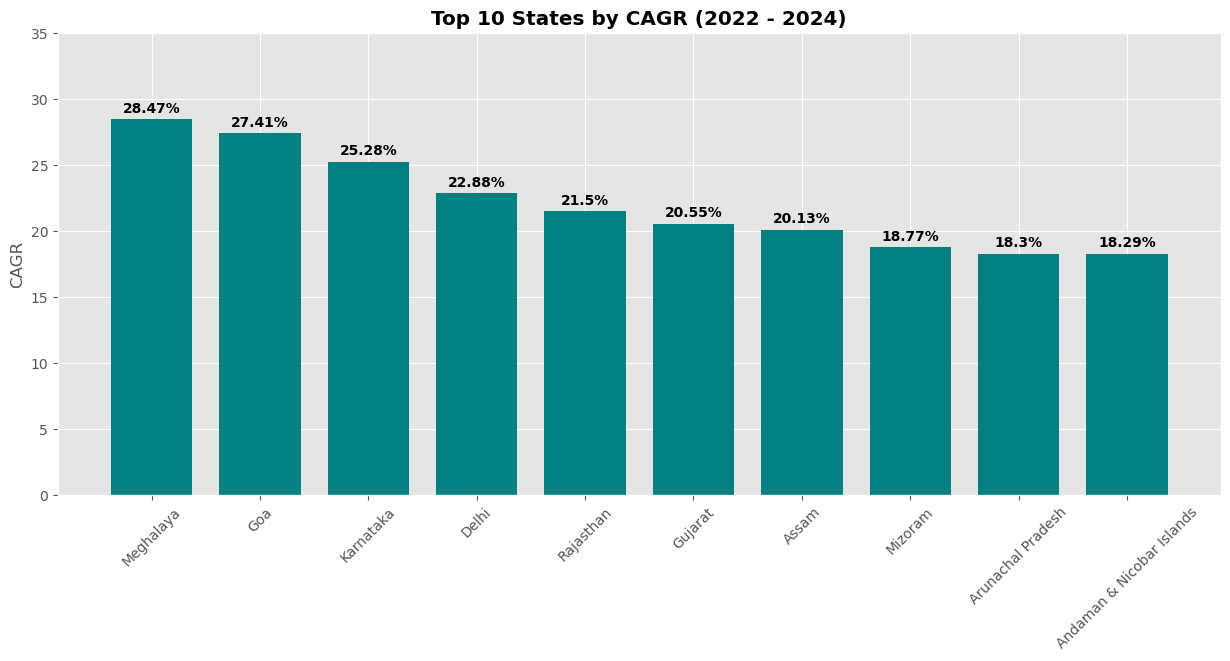

In [39]:
plt.figure(figsize = (15, 6))

plt.bar(CAGR_States["State"], CAGR_States["CAGR"], color = 'teal', align = 'center', width = 0.75)

for i, value in enumerate(CAGR_States["CAGR"]):
    plt.text(i, value + 0.5, str(value) + '%', ha = 'center', fontsize = 10, fontweight = 'bold')

plt.title("Top 10 States by CAGR (2022 - 2024)", fontweight = 'bold')
plt.xlabel('')
plt.ylabel("CAGR")
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 36, 5))

#x = np.arange(len(CAGR_States["CAGR"]))
#y = CAGR_States["CAGR"].values

#plt.plot(x, y, color = 'darkred')

plt.show()

# 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [41]:
df = pd.merge(left = df_date, right = df_makers, on = 'date', how = 'inner')
df['month'] = df['date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)

df = df[df['fiscal_year'].isin([2022, 2023, 2024])]

df = df.groupby(['month', 'fiscal_year'], as_index = False)['electric_vehicles_sold'].sum()

#df_pivot = df.pivot(index = 'month', columns = 'fiscal_year', values = 'electric_vehicles_sold')

#df_pivot

C:\Users\Asit Bhagat\AppData\Local\Temp\ipykernel_12852\2724991167.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['month', 'fiscal_year'], as_index = False)['electric_vehicles_sold'].sum()


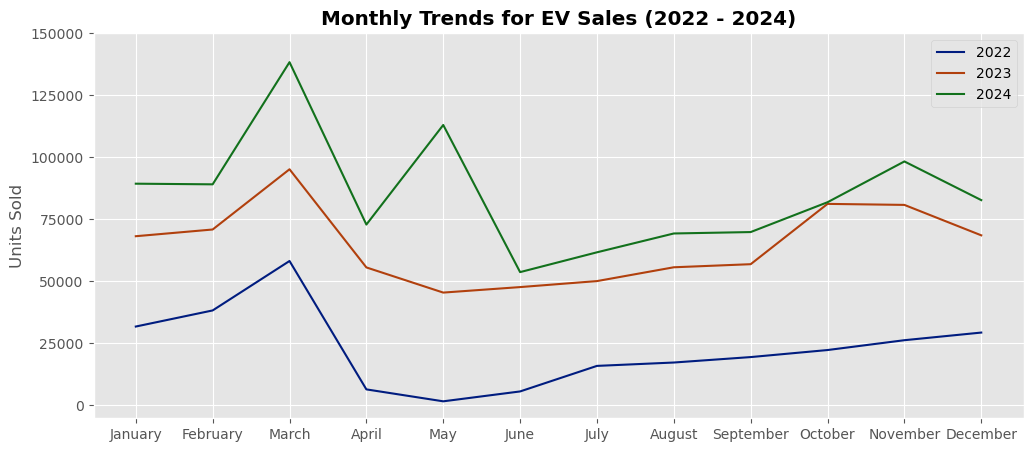

In [42]:
plt.figure(figsize = (12, 5))

sns.lineplot(data = df, x = 'month', y = 'electric_vehicles_sold', hue = 'fiscal_year', palette = 'dark')

plt.title("Monthly Trends for EV Sales (2022 - 2024)", fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Units Sold')
plt.yticks(np.arange(0, 150001, 25000))
plt.legend(loc = 'best')
plt.show()

# 9. What is the projected number of EV sales (including 2-wheelers and 4- wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [44]:
df = pd.merge(left = df_date, right = df_state, on = 'date', how = 'inner')

df = df.groupby(["state", "fiscal_year"], as_index = False)[["electric_vehicles_sold", "total_vehicles_sold"]].sum()

ev_2022 = df.copy()
ev_2022 = ev_2022[ev_2022['fiscal_year'] == 2022]
ev_2022.pop('total_vehicles_sold')
ev_2022

ev_2024 = df.copy()
ev_2024 = ev_2024[ev_2024['fiscal_year'] == 2024]
ev_2024.pop('total_vehicles_sold')
ev_2024

ev_CAGR = pd.merge(left = ev_2022, right = ev_2024, on = 'state', how = 'inner')
ev_CAGR = ev_CAGR.rename(columns = {'state': 'State', 'electric_vehicles_sold_x': 'EV Sales 2022', 'electric_vehicles_sold_y': 'EV Sales 2024'})
ev_CAGR = ev_CAGR.drop(columns = ['fiscal_year_x', 'fiscal_year_y'])

ev_CAGR["EV CAGR"] = round((ev_CAGR["EV Sales 2024"] / ev_CAGR["EV Sales 2022"]) ** (1 / 2) - 1, 4)

ev_CAGR["EV CAGR"] = np.where(ev_CAGR["EV Sales 2022"] == 0, 0, ev_CAGR["EV CAGR"])

ev_CAGR["2030 Forecasted EV Sales"] = ((1 + ev_CAGR["EV CAGR"]) ** 6) * ev_CAGR["EV Sales 2024"]

ev_CAGR

,State,EV Sales 2022,EV Sales 2024,EV CAGR,2030 Forecasted EV Sales
0,Andaman & Nicobar Islands,22,35,0.2613,1.409219e+02
1,Andhra Pradesh,13928,33183,0.5435,4.486994e+05
2,Arunachal Pradesh,0,31,0.0000,3.100000e+01
3,Assam,730,3497,1.1887,3.844263e+05
4,Bihar,4829,15069,0.7665,4.578954e+05
5,Chandigarh,411,2877,1.6458,9.869200e+05
6,Chhattisgarh,4534,28540,1.5089,7.117936e+06
7,DNH and DD,35,198,1.3785,3.584958e+04
8,Delhi,16535,46724,0.6810,1.054257e+06
9,Goa,1778,10799,1.4645,2.419672e+06


In [45]:
tv_2022 = df.copy()
tv_2022 = tv_2022[tv_2022['fiscal_year'] == 2022]
tv_2022.pop('electric_vehicles_sold')
tv_2022

tv_2024 = df.copy()
tv_2024 = tv_2024[tv_2024['fiscal_year'] == 2024]
tv_2024.pop('electric_vehicles_sold')
tv_2024

tv_CAGR = pd.merge(left = tv_2022, right = tv_2024, on = 'state', how = 'inner')

tv_CAGR = tv_CAGR.rename(columns = {'state': 'State', 'total_vehicles_sold_x': 'Total Sales 2022', 'total_vehicles_sold_y': 'Total Sales 2024'})
tv_CAGR = tv_CAGR.drop(columns = ['fiscal_year_x', 'fiscal_year_y'])

tv_CAGR['Total CAGR'] = round((tv_CAGR['Total Sales 2024'] / tv_CAGR['Total Sales 2022']) ** (1 / 2) - 1, 4)

tv_CAGR['Total CAGR'] = np.where(tv_CAGR['Total Sales 2022'] == 0, 0, tv_CAGR['Total CAGR'])

tv_CAGR['2030 Forecasted Total Sales'] = ((1 + tv_CAGR["Total CAGR"]) ** 6) * tv_CAGR["Total Sales 2024"]

tv_CAGR

,State,Total Sales 2022,Total Sales 2024,Total CAGR,2030 Forecasted Total Sales
0,Andaman & Nicobar Islands,5148,7203,0.1829,1.973339e+04
1,Andhra Pradesh,772748,782865,0.0065,8.138972e+05
2,Arunachal Pradesh,19929,27892,0.1830,7.645187e+04
3,Assam,379450,547626,0.2013,1.645860e+06
4,Bihar,892873,1132703,0.1263,2.312281e+06
5,Chandigarh,36954,45147,0.1053,8.232086e+04
6,Chhattisgarh,390272,503068,0.1353,1.077186e+06
7,DNH and DD,12413,16400,0.1494,3.781560e+04
8,Delhi,401540,606348,0.2288,2.087417e+06
9,Goa,48372,78524,0.2741,3.359104e+05


In [46]:
df_combined = pd.merge(left = ev_CAGR, right = tv_CAGR, on = 'State', how = 'inner')

df_pen_rate_2030 = df_combined.copy()

df_pen_rate_2030["Penetration Rate 2022"] = round((df_pen_rate_2030["EV Sales 2022"] / df_pen_rate_2030["Total Sales 2022"]) * 100, 2)

df_pen_rate_2030["Penetration Rate 2024"] = round((df_pen_rate_2030["EV Sales 2024"] / df_pen_rate_2030["Total Sales 2024"]) * 100, 2)

df_pen_rate_2030["Penetration Rate 2030"] = round(
    (df_pen_rate_2030["2030 Forecasted EV Sales"] / df_pen_rate_2030["2030 Forecasted Total Sales"]) * 100, 2)

df_pen_rate_2030 = df_pen_rate_2030.sort_values(by = "Penetration Rate 2024", ascending = False).head(10)

df_pen_rate_2030 = df_pen_rate_2030[["State", "EV CAGR", "Penetration Rate 2024", "EV Sales 2024", "2030 Forecasted EV Sales"]]

df_pen_rate_2030["EV CAGR"] = round(df_pen_rate_2030["EV CAGR"] * 100, 2)

df_pen_rate_2030["2030 Forecasted EV Sales"] = round(df_pen_rate_2030["2030 Forecasted EV Sales"] / 1_000_000, 2)

df_pen_rate_2030 = df_pen_rate_2030.rename(columns = {'EV CAGR': 'EV CAGR(2022-24)', '2030 Forecasted EV Sales': '2030 Forecasted EV Sales (Millions)'})

df_pen_rate_2030

,State,EV CAGR(2022-24),Penetration Rate 2024,EV Sales 2024,2030 Forecasted EV Sales (Millions)
9,Goa,146.45,13.75,10799,2.42
16,Kerala,132.83,11.59,73938,11.78
15,Karnataka,93.24,10.18,160989,8.38
19,Maharashtra,101.89,8.60,197169,13.35
8,Delhi,68.10,7.71,46724,1.05
5,Chandigarh,164.58,6.37,2877,0.99
24,Odisha,102.94,6.33,39118,2.73
6,Chhattisgarh,150.89,5.67,28540,7.12
29,Tamil Nadu,59.95,5.49,94314,1.58
25,Puducherry,105.44,5.37,3098,0.23


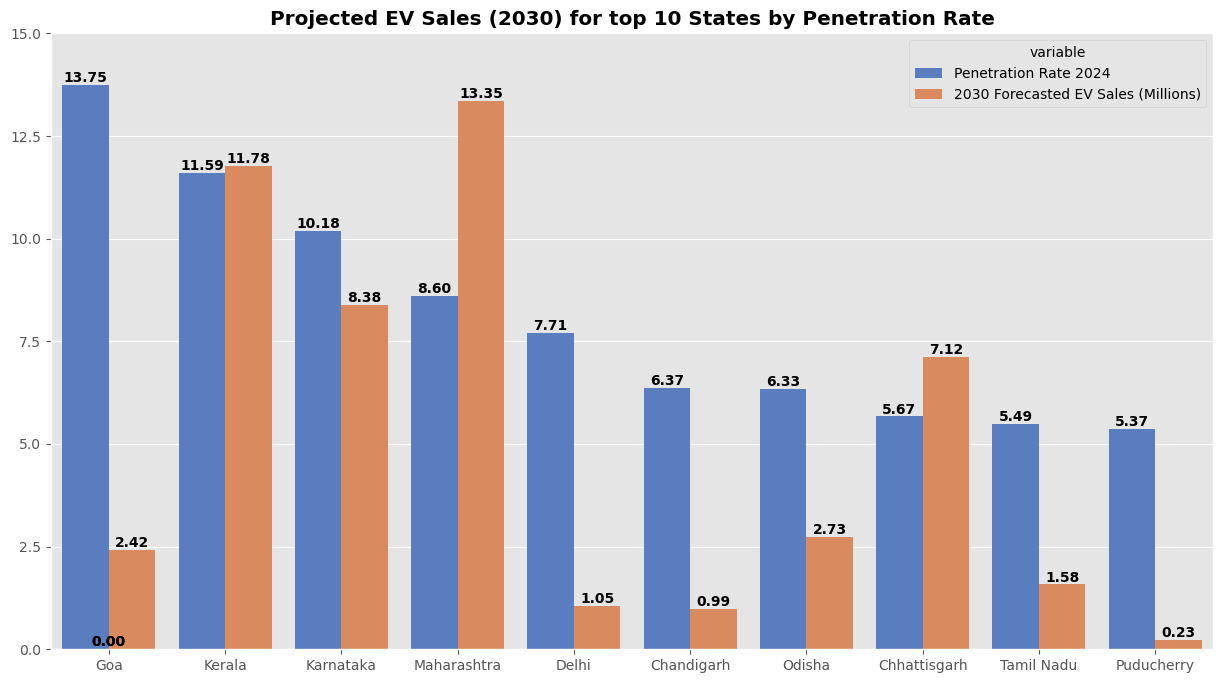

In [47]:
df_melted = pd.melt(df_pen_rate_2030, id_vars="State", value_vars=["Penetration Rate 2024", "2030 Forecasted EV Sales (Millions)"],
                    var_name="variable", value_name="value")
#df_melted

plt.figure(figsize = (15, 8))

ax = sns.barplot(x="State", y="value", hue="variable", data=df_melted, palette="muted")

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  # Format label with 2 decimal places
                (p.get_x() + p.get_width() / 2., height),  # Position of the label
                ha='center', va='center',  # Alignment of the label
                fontsize=10, fontweight = 'bold', color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Projected EV Sales (2030) for top 10 States by Penetration Rate", fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks(np.arange(0, 16, 2.5))
plt.show()